# **Ringkasan Berita**

# Import Modul

In [1]:
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np
import nltk
import re
import joblib

nltk.download('stopwords')
nltk.download('punkt')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Menampilkan Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ppw/beritanasionalpolitik.csv')
df

,Judul,Isi,Label
0,"Warga Depok Keluhkan KIS Tiba-tiba Non-aktif, ...","DEPOK, KOMPAS.com - Kepala Dinas Sosial Kota ...",Nasional
1,IDI Konfirmasi Kenaikan Kasus Covid-19 di Indo...,"JAKARTA, KOMPAS.com - Ketua Satuan Tugas (Satg...",Nasional
2,"Didukung Pergerakan Perempuan Muda Nahdliyin, ...","JAKARTA, KOMPAS.com - Pergerakan Perempuan Mud...",Nasional
3,KSAD Maruli Minta Puspenerbad Susun Teori Baru...,"JAKARTA, KOMPAS.com - Kepala Staf TNI Angkatan...",Nasional
4,"Setiap Sesi Debat, Capres dan Cawapres Saling ...","JAKARTA, KOMPAS.com- Komisi Pemilihan Umum (KP...",Nasional
...,...,...,...
586,"Jubir PKB: Kami Setuju Pembahasan RUU DKJ, asa...",KOMPAS.com - Juru Bicara (Jubir) Fraksi Partai...,Politik
587,"Soal Rencana Pengalihan Anggaran Bansos, TKN P...",KOMPAS.com - Ketua Tim Komunikasi Tim Kampanye...,Politik
588,"Soal Perubahan Format Debat, TKN Sebut Siap De...",KOMPAS.com - Sekretaris Tim Kampanye Nasional ...,Politik
589,"Cegah Politisasi Bansos Jelang Pemilu 2024, Sa...",KOMPAS.com – Ketua Badan Anggaran (Banggar) De...,Politik


# Membersihkan Data

In [3]:
df.isnull().sum()

Judul    0
Isi      0
Label    0
dtype: int64

In [4]:
df = df.dropna()
df.isnull().sum()

Judul    0
Isi      0
Label    0
dtype: int64

In [5]:
df.shape

(591, 3)

# Menghapus kata yang tidak perlu

In [6]:
def cleaning(text):
  text = re.sub(r'[^\w\s.?!,]', '', text).strip()
  return text

df['Cleaning'] = df['Isi'].apply(cleaning)
df['Cleaning']

0      DEPOK, KOMPAS.com  Kepala Dinas Sosial Kota De...
1      JAKARTA, KOMPAS.com  Ketua Satuan Tugas Satgas...
2      JAKARTA, KOMPAS.com  Pergerakan Perempuan Muda...
3      JAKARTA, KOMPAS.com  Kepala Staf TNI Angkatan ...
4      JAKARTA, KOMPAS.com Komisi Pemilihan Umum KPU ...
                             ...                        
586    KOMPAS.com  Juru Bicara Jubir Fraksi Partai Ke...
587    KOMPAS.com  Ketua Tim Komunikasi Tim Kampanye ...
588    KOMPAS.com  Sekretaris Tim Kampanye Nasional T...
589    KOMPAS.com  Ketua Badan Anggaran Banggar Dewan...
590    KOMPAS.com  Ketua Partai Kebangkitan Bangsa PK...
Name: Cleaning, Length: 591, dtype: object

# Tokenisasi

In [7]:
def tokenizer(text):
  text = text.lower()
  return sent_tokenize(text)

df['Tokenizing'] = df['Cleaning'].apply(tokenizer)
df['Tokenizing']

0      [depok, kompas.com  kepala dinas sosial kota d...
1      [jakarta, kompas.com  ketua satuan tugas satga...
2      [jakarta, kompas.com  pergerakan perempuan mud...
3      [jakarta, kompas.com  kepala staf tni angkatan...
4      [jakarta, kompas.com komisi pemilihan umum kpu...
                             ...                        
586    [kompas.com  juru bicara jubir fraksi partai k...
587    [kompas.com  ketua tim komunikasi tim kampanye...
588    [kompas.com  sekretaris tim kampanye nasional ...
589    [kompas.com  ketua badan anggaran banggar dewa...
590    [kompas.com  ketua partai kebangkitan bangsa p...
Name: Tokenizing, Length: 591, dtype: object

# Graph Cosine Similarity

In [8]:
def graph_cosine_sim(x, threshold = 0.11):
  # TFIDF
  vectorizer = TfidfVectorizer()
  tfidf = vectorizer.fit_transform(x)
  cos_sim = cosine_similarity(tfidf)
  G = nx.Graph()

  # Mengisi nilai similarity antara kalimat ke dalam edges (Garis Penghubung)
  for i in range(len(x)):
    for j in range(i+1, len(x)):
      sim = cos_sim[i][j]
      if sim > threshold:
        G.add_edge(i, j, weight=sim)

  return G

# Plot Graph

In [9]:
def plot_graph(G, figsize=(35, 30), node_size=700, node_color='skyblue'):
  # Menggambar graf dengan canvas yang diperbesar
  pos = nx.spring_layout(G)  # Menentukan posisi simpul
  labels = nx.get_edge_attributes(G, 'weight')

  # Menentukan ukuran canvas
  plt.figure(figsize=(35, 30))

  # Menggambar graf dengan ukuran canvas yang diperbesar
  nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue')
  nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')
  plt.show()

# Ringkasan

In [10]:
def summarization(x, k = 4, index=6, threshold=0.11, show_centrality=False):
  # Memasukkan Nilai Cosine Similirity ke dalam Graph
  G = graph_cosine_sim(x, threshold)

  # Menghitung nilai dari closeness centrality
  centrality = nx.closeness_centrality(G)
  if show_centrality:
    print(f"Nilai Closeness Centrality Dokumen Ke - {index} : {centrality}")

  # Menyusun Kalimat berdasarkan nilai Closeness Centrality tertinggi dan lebih dari treshold
  centrality = dict(sorted(centrality.items(), key=lambda item : item[1], reverse=True))

  summary_sentences = []
  for i, centr in enumerate(centrality.items()):
    if i < k:
      summary_sentences.append(x[centr[0]])

  return (' '.join(summary_sentences), G)

# Ringkasan Semua Data

In [11]:
df["Summary"] = df.apply(lambda row : summarization(row['Tokenizing'], index=row.name+1, k=7, show_centrality=True)[0], axis=1)

Nilai Closeness Centrality Dokumen Ke - 1 : {0: 0.6, 2: 0.48, 4: 0.5714285714285714, 6: 0.42857142857142855, 7: 0.631578947368421, 11: 0.6, 1: 0.3870967741935484, 5: 0.34285714285714286, 9: 0.4444444444444444, 8: 0.46153846153846156, 10: 0.4444444444444444, 13: 0.3333333333333333, 12: 0.41379310344827586}
Nilai Closeness Centrality Dokumen Ke - 2 : {0: 0.8, 2: 0.8, 3: 0.8, 4: 1.0, 5: 0.5714285714285714}
Nilai Closeness Centrality Dokumen Ke - 3 : {0: 0.4090909090909091, 1: 0.5294117647058824, 2: 0.6, 4: 0.45, 7: 0.5625, 3: 0.42857142857142855, 6: 0.42857142857142855, 8: 0.45, 9: 0.34615384615384615, 10: 0.2647058823529412}
Nilai Closeness Centrality Dokumen Ke - 4 : {}
Nilai Closeness Centrality Dokumen Ke - 5 : {0: 0.8, 1: 0.8, 5: 0.8, 6: 1.0, 4: 0.8}
Nilai Closeness Centrality Dokumen Ke - 6 : {0: 0.5952380952380952, 1: 0.40322580645161293, 2: 0.5, 3: 0.4166666666666667, 4: 0.44642857142857145, 6: 0.390625, 7: 0.5434782608695653, 9: 0.4807692307692307, 10: 0.36764705882352944, 16: 0.

In [12]:
summary, G = summarization(df["Tokenizing"].iloc[:1][0], k = 5, show_centrality=True, threshold=0.2)

Nilai Closeness Centrality Dokumen Ke - 6 : {0: 0.4375, 2: 0.4666666666666667, 4: 0.6363636363636364, 1: 0.4375, 7: 0.6363636363636364, 8: 0.4666666666666667, 9: 0.4117647058823529, 10: 0.3333333333333333}


In [13]:
summary

'depok kan sudah uhc universal health coverage tinggal tunjukkan saja nik, kata lulu kepada kompas.com, rabu namun, jika dalam keadaan sehat dan kis nya tibatiba tidak aktif, warga depok bisa mendatangi fasilitator kelurahan faskel di kelurahan masingmasing untuk aktivasi. nanti diverifikasi validasi, yang lakuin adalah faskel, terang lulu.baca juga mal pelayanan publik kota depok ditargetkan rampung bulan ini, beroperasi januari 2024 namun, karena di satu kelurahan faskelnya hanya ada satu, butuh waktu untuk verifikasi dan yang diprioritaskan adalah warga yang dalam keadaan sakit. sehingga warga yang dalam kondisi sakit tidak perlu khawatir bila status kis di jkn jaminan kesehatan nasional tibatiba nonaktif.baca juga dinsos depok minta warga tak khawatir jika kis mendadak tidak aktif karena sudah uhc per 1 desember 2023 maka dari itu semua pasien bpjs kesehatan pbi penerima bantuan iuran non aktif atau aktif langsung ke rumah sakit nunjukin nik. diverifikasi validasi, yang lakukan ada

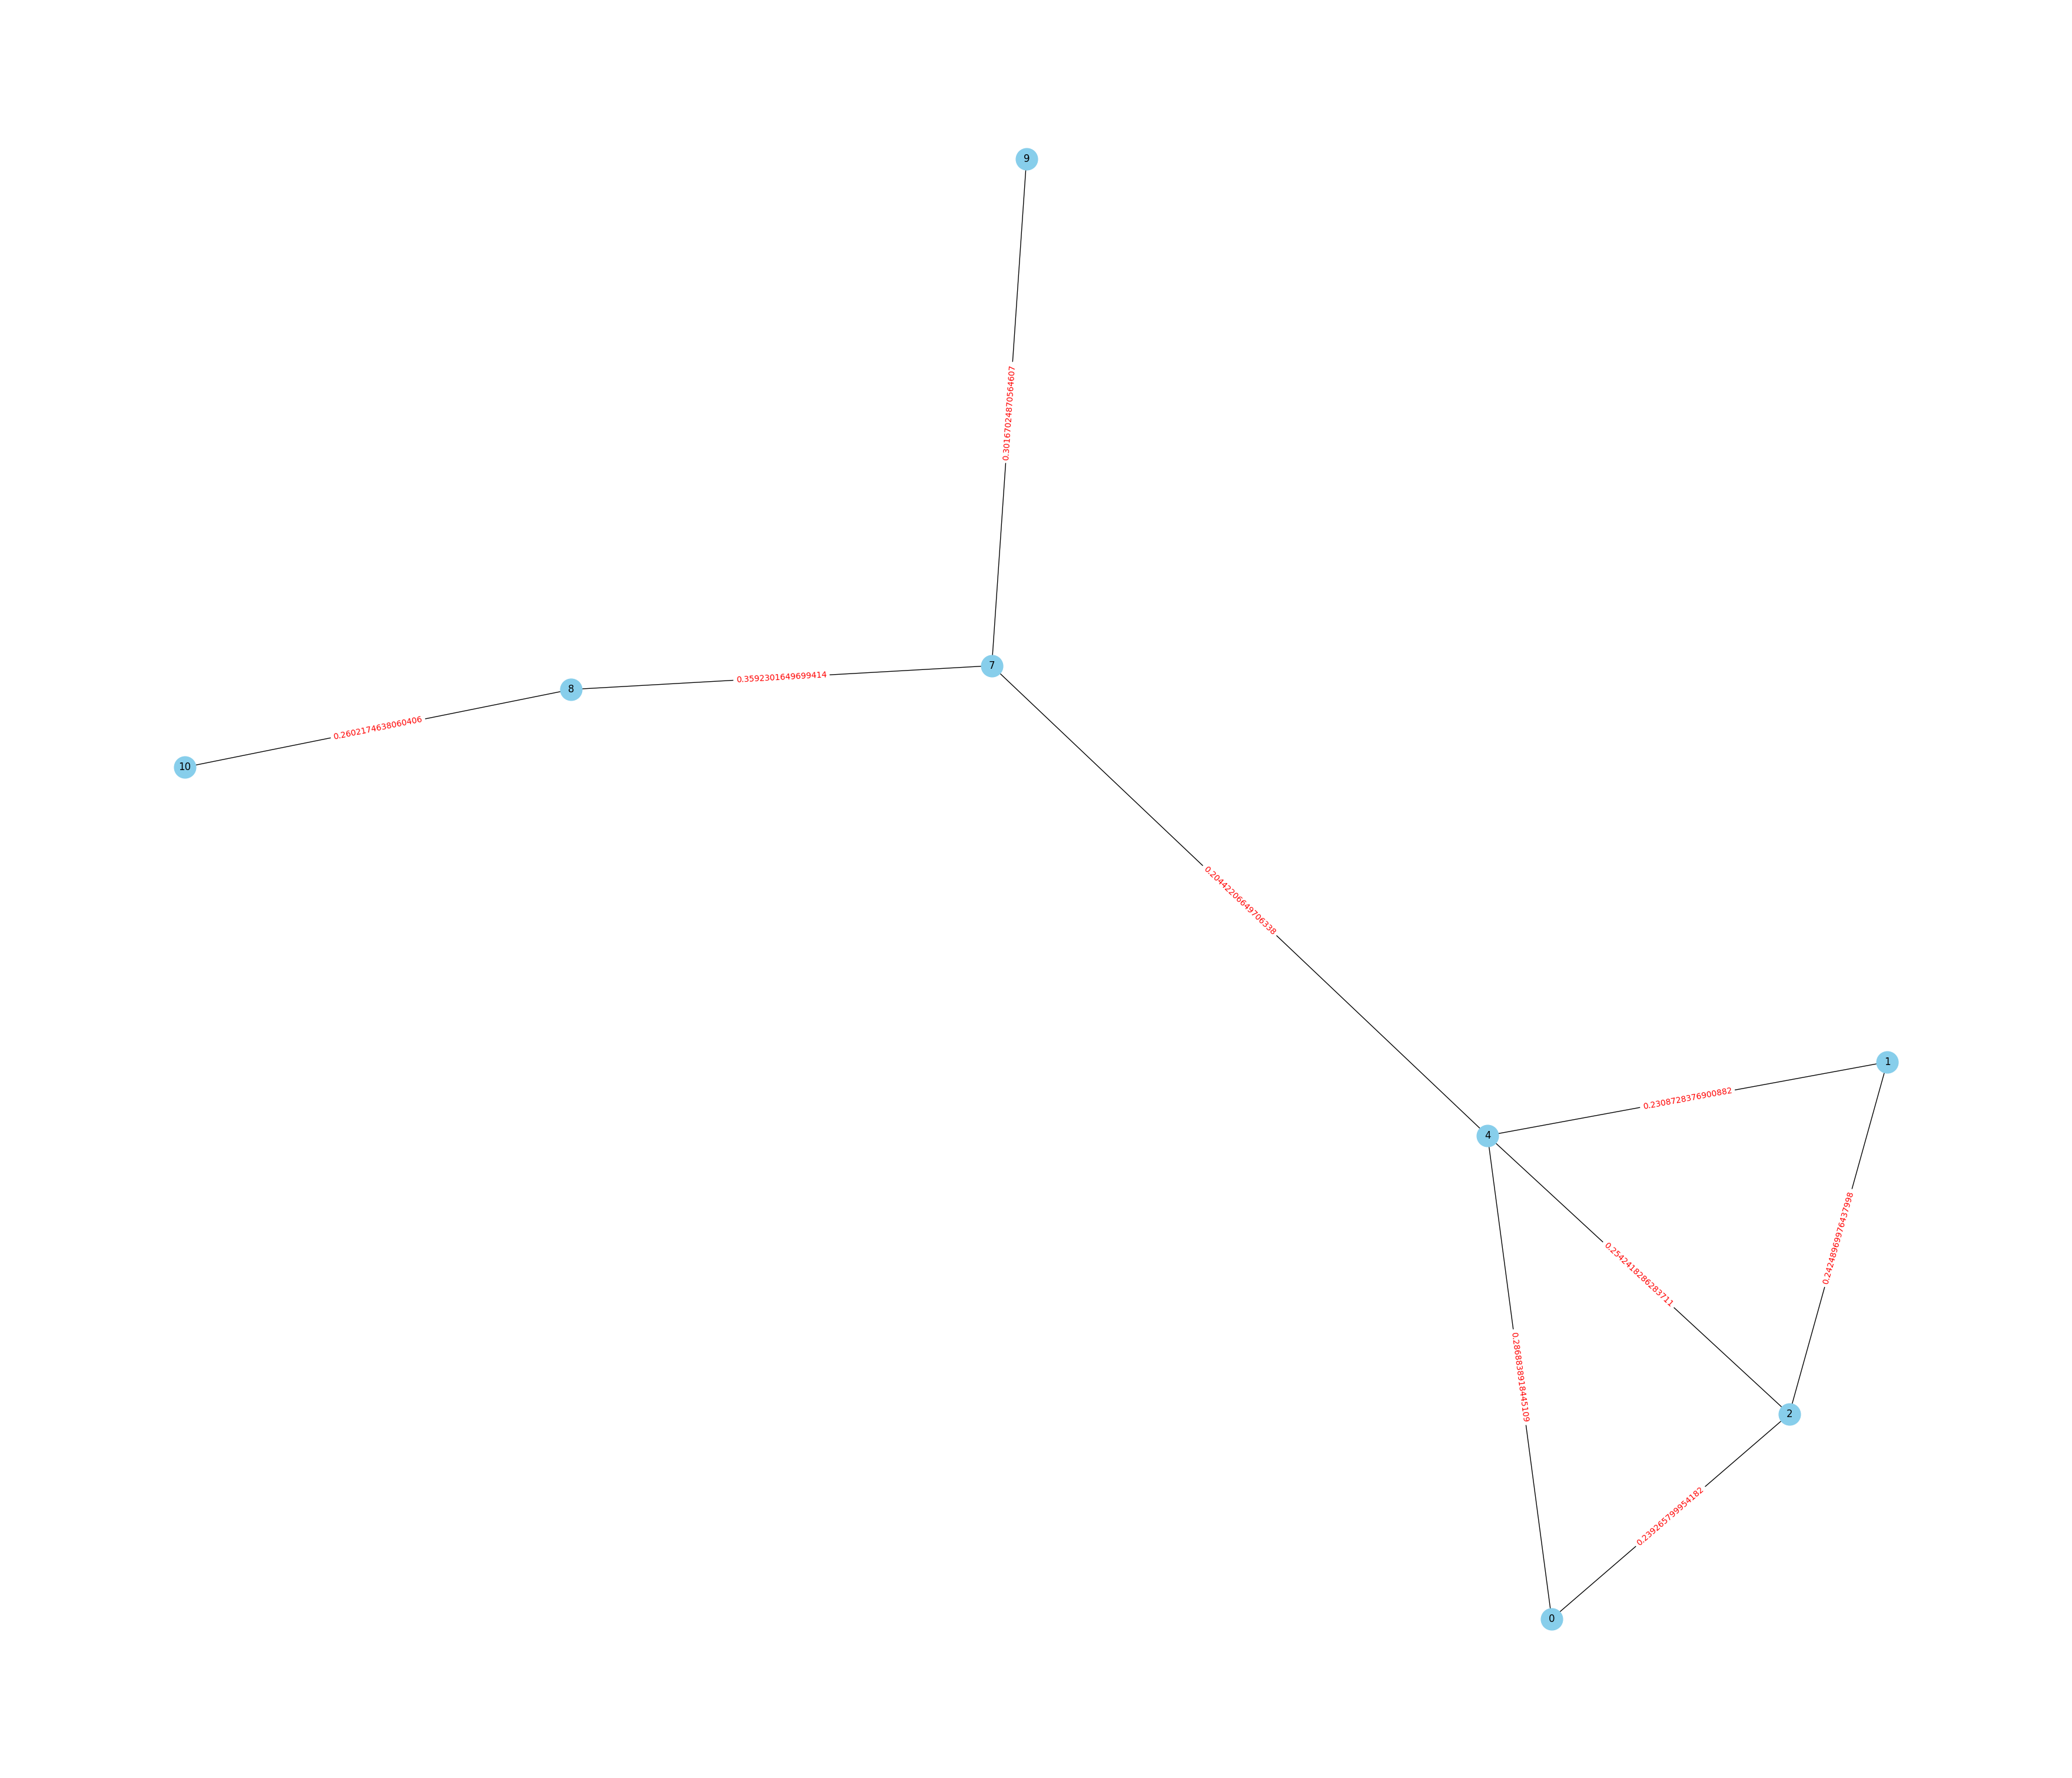

In [14]:
plot_graph(G)

# Memanggil Data Hasil Ringkasan

In [15]:
new_df = df[["Summary", "Label"]]
new_df

,Summary,Label
0,"nanti diverifikasi validasi, yang lakuin adala...",Nasional
1,"namun, memang terjadi lonjakan kasus juga kala...",Nasional
2,"kedua, penguatan strategi pencegahan dan penan...",Nasional
3,,Nasional
4,"kalau debat cawapres, sepenuhnya cawapres, uja...",Nasional
...,...,...
586,kompas.com juru bicara jubir fraksi partai ke...,Politik
587,kompas.com ketua tim komunikasi tim kampanye ...,Politik
588,sudah ketahuan pihak mana yang mengusulkan per...,Politik
589,upaya ini dapat dicapai dengan fokus pada sist...,Politik


In [16]:
new_df.to_csv('Berita Hasil Ringkasan.csv')

# Modeling

In [17]:
df["Summary"][0]

'nanti diverifikasi validasi, yang lakuin adalah faskel, terang lulu.baca juga mal pelayanan publik kota depok ditargetkan rampung bulan ini, beroperasi januari 2024 namun, karena di satu kelurahan faskelnya hanya ada satu, butuh waktu untuk verifikasi dan yang diprioritaskan adalah warga yang dalam keadaan sakit. depok, kompas.com  kepala dinas sosial kota depok asloeah madjri lulu mengatakan, warga depok yang kartu indonesia sehat kis nya tibatiba nonaktif, bisa langsung menyebutkan nik saat berobat ke rumah sakit atau puskesmas setempat. setelah diparameter kemiskinan, oh yang bersangkutan miskin, ya sudah didaftarkan oleh faskel ke dtks data terpadu kesejahteraan sosial, kata lulu.baca juga umk kota depok 2024 ditetapkan naik jadi rp 4,8 jutadapatkan update berita pilihan dan breaking news setiap hari dari kompas.com. depok kan sudah uhc universal health coverage tinggal tunjukkan saja nik, kata lulu kepada kompas.com, rabu namun, jika dalam keadaan sehat dan kis nya tibatiba tidak

In [18]:
vectorizer_summary = TfidfVectorizer()
X_summary = vectorizer_summary.fit_transform(df["Summary"]).toarray()
y = df["Label"]

In [19]:
X_train_summary, X_test_summary, y_train_summary, y_test_summary = train_test_split(X_summary, y, test_size=0.3, random_state=42)

In [20]:
# Inisialisasi model Naive Bayes Gaussian
gnb_summary = GaussianNB()

# Melatih model menggunakan data latih
gnb_summary.fit(X_train_summary, y_train_summary)

# Membuat prediksi pada data uji
y_pred_gnb_summary = gnb_summary.predict(X_test_summary)

# Mengukur kinerja model dengan menghitung akurasi atau metrik lain yang relevan
accuracy = accuracy_score(y_test_summary, y_pred_gnb_summary)
print(f'Akurasi: {accuracy}')

Akurasi: 1.0


In [21]:
report = classification_report(y_test_summary, y_pred_gnb_summary)
print(f'Report Klasifikasi:\n{report}')

Report Klasifikasi:
              precision    recall  f1-score   support

    Nasional       1.00      1.00      1.00        73
     Politik       1.00      1.00      1.00       105

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



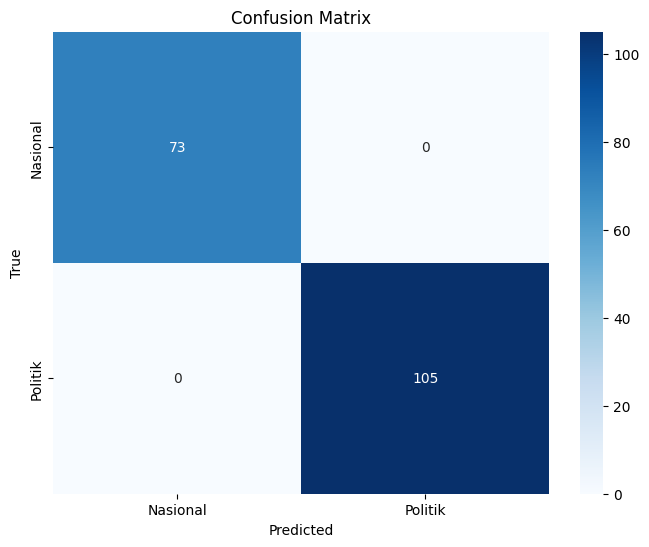

In [22]:
def plot_confusion_matrix(cm):
  # Membuat plot confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=gnb_summary.classes_, yticklabels=gnb_summary.classes_)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

cm = confusion_matrix(y_test_summary, y_pred_gnb_summary)
plot_confusion_matrix(cm)

## Prediksi Data

In [23]:
new_data = ['Menteri Perdagangan Zulkifli Hasan atau Zulhas menjelaskan progres utang atau pembayaran selisih harga minyak goreng (rafaksi) 2022 kepada pengusaha. Zulhas mengatakan sampai saat ini pihak pemerintah memang belum memproses pembayaran utang tersebut kepada pengusaha.Adapun pembayaran utang rafaksi tersebut dilakukan oleh Badan Pengelola Dana Perkebunan Kelapa Sawit (BPDPKS). Namun, pembayaran itu harus atas rekomendasi Kemendag. Dapat kami sampaikan terkait dengan rafaksi minyak goreng di mana saat ini BPDPKS belum melakukan pembayaran dikarenakan Kemendag selaku lembaga verifikator belum menyampaikan hasil verifikasi yang dilakukan oleh PT Sucofindo kepada BPDKS, kata Zulhas dalam rapat dengan Kementerian Perdagangan dengan Komisi VI DPR RI, Senin (27/11/2023). Baca artikel detikfinance, Di Depan DPR Zulhas Buka-bukaan soal Utang Pemerintah ke Pengusaha Minyak Goreng']
new_data_summary, G = summarization(tokenizer(new_data[0]), k=5)
new_data_summary

'menteri perdagangan zulkifli hasan atau zulhas menjelaskan progres utang atau pembayaran selisih harga minyak goreng (rafaksi) 2022 kepada pengusaha. zulhas mengatakan sampai saat ini pihak pemerintah memang belum memproses pembayaran utang tersebut kepada pengusaha.adapun pembayaran utang rafaksi tersebut dilakukan oleh badan pengelola dana perkebunan kelapa sawit (bpdpks). dapat kami sampaikan terkait dengan rafaksi minyak goreng di mana saat ini bpdpks belum melakukan pembayaran dikarenakan kemendag selaku lembaga verifikator belum menyampaikan hasil verifikasi yang dilakukan oleh pt sucofindo kepada bpdks, kata zulhas dalam rapat dengan kementerian perdagangan dengan komisi vi dpr ri, senin (27/11/2023). baca artikel detikfinance, di depan dpr zulhas buka-bukaan soal utang pemerintah ke pengusaha minyak goreng'

In [24]:
tfidf_Xnew_summary = vectorizer_summary.transform([new_data_summary]).toarray()
tfidf_Xnew_summary

array([[0., 0., 0., ..., 0., 0., 0.]])

In [25]:
pred_gnb_summary = gnb_summary.predict(tfidf_Xnew_summary)
pred_gnb_summary[0]

'Nasional'

In [26]:
joblib.dump(gnb_summary, 'modelNB.pkl')

['modelNB.pkl']

## SVM (Support Vectore Machine)

In [27]:
svm_summary = SVC()

# Melatih model menggunakan data latih
svm_summary.fit(X_train_summary, y_train_summary)

# Membuat prediksi pada data uji
y_pred_svm_summary = svm_summary.predict(X_test_summary)

# Mengukur kinerja model dengan menghitung akurasi atau metrik lain yang relevan
accuracy = accuracy_score(y_test_summary, y_pred_svm_summary)
print(f'Akurasi: {accuracy}')

Akurasi: 1.0


In [28]:
report = classification_report(y_test_summary, y_pred_svm_summary)
print(f'Report Klasifikasi:\n{report}')

Report Klasifikasi:
              precision    recall  f1-score   support

    Nasional       1.00      1.00      1.00        73
     Politik       1.00      1.00      1.00       105

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



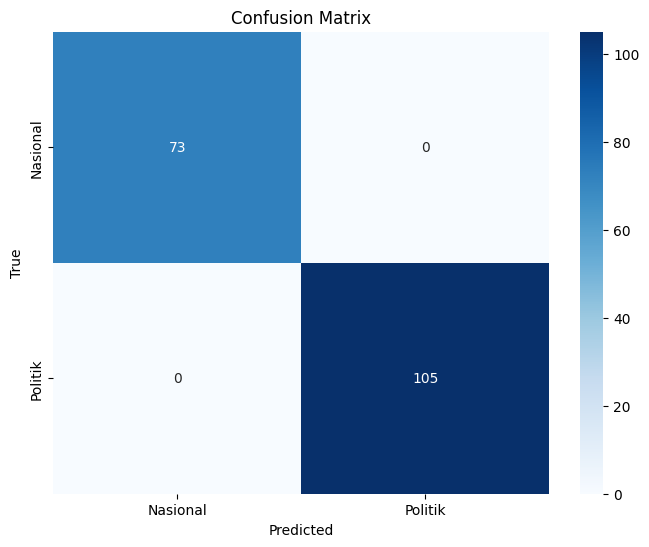

In [29]:
def plot_confusion_matrix(cm):
  # Membuat plot confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_summary.classes_, yticklabels=svm_summary.classes_)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

cm = confusion_matrix(y_test_summary, y_pred_svm_summary)
plot_confusion_matrix(cm)

# Prediksi

In [30]:
new_data = ['Menteri Perdagangan Zulkifli Hasan atau Zulhas menjelaskan progres utang atau pembayaran selisih harga minyak goreng (rafaksi) 2022 kepada pengusaha. Zulhas mengatakan sampai saat ini pihak pemerintah memang belum memproses pembayaran utang tersebut kepada pengusaha.Adapun pembayaran utang rafaksi tersebut dilakukan oleh Badan Pengelola Dana Perkebunan Kelapa Sawit (BPDPKS). Namun, pembayaran itu harus atas rekomendasi Kemendag. Dapat kami sampaikan terkait dengan rafaksi minyak goreng di mana saat ini BPDPKS belum melakukan pembayaran dikarenakan Kemendag selaku lembaga verifikator belum menyampaikan hasil verifikasi yang dilakukan oleh PT Sucofindo kepada BPDKS, kata Zulhas dalam rapat dengan Kementerian Perdagangan dengan Komisi VI DPR RI, Senin (27/11/2023). Baca artikel detikfinance, Di Depan DPR Zulhas Buka-bukaan soal Utang Pemerintah ke Pengusaha Minyak Goreng']
new_data_summary, G = summarization(tokenizer(new_data[0]), k=5)
new_data_summary

'menteri perdagangan zulkifli hasan atau zulhas menjelaskan progres utang atau pembayaran selisih harga minyak goreng (rafaksi) 2022 kepada pengusaha. zulhas mengatakan sampai saat ini pihak pemerintah memang belum memproses pembayaran utang tersebut kepada pengusaha.adapun pembayaran utang rafaksi tersebut dilakukan oleh badan pengelola dana perkebunan kelapa sawit (bpdpks). dapat kami sampaikan terkait dengan rafaksi minyak goreng di mana saat ini bpdpks belum melakukan pembayaran dikarenakan kemendag selaku lembaga verifikator belum menyampaikan hasil verifikasi yang dilakukan oleh pt sucofindo kepada bpdks, kata zulhas dalam rapat dengan kementerian perdagangan dengan komisi vi dpr ri, senin (27/11/2023). baca artikel detikfinance, di depan dpr zulhas buka-bukaan soal utang pemerintah ke pengusaha minyak goreng'

In [31]:
tfidf_Xnew_summary = vectorizer_summary.transform([new_data_summary]).toarray()
tfidf_Xnew_summary

array([[0., 0., 0., ..., 0., 0., 0.]])

In [32]:
pred_svm_summary = svm_summary.predict(tfidf_Xnew_summary)
pred_svm_summary[0]

'Nasional'

In [33]:
joblib.dump(svm_summary, 'modelSVM.pkl')

['modelSVM.pkl']

In [34]:
joblib.dump(vectorizer_summary, 'vectorizer.pkl')

['vectorizer.pkl']